In [1]:
import os, sys

# 把工作目錄切到專案根目錄 nn-from-scratch
os.chdir("..")

# 讓 Python 在專案根目錄下找 module
sys.path.insert(0, os.getcwd())

print("Current working directory:", os.getcwd())
print("sys.path[0]:", sys.path[0])

Current working directory: /Users/lauren/nn-from-scratch
sys.path[0]: /Users/lauren/nn-from-scratch


# Neural Network from Scratch (NumPy)
Goal: Train a 2-layer neural network on a simple 2D classification dataset (two moons) and visualize learning behavior.

**What this demonstrates**
- Forward pass / backprop implementation
- Binary cross-entropy loss
- Gradient descent training loop
- Basic evaluation & visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.data import make_dataset
from src.nn_numpy import TwoLayerNN

np.random.seed(42)

## 1. Dataset
We use `make_moons` to create a non-linearly separable binary classification dataset.
We standardize features using `StandardScaler`.


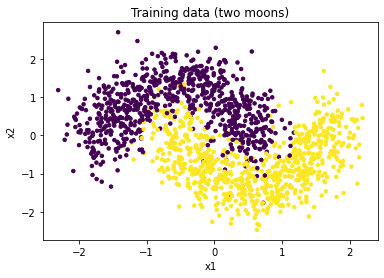

Train: (1500, 2) (1500,)


In [5]:
X_train, X_test, y_train, y_test = make_dataset(n_samples=2000, noise=0.25, random_state=42)

plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=12)
plt.title("Training data (two moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

print("Train:", X_train.shape, y_train.shape)

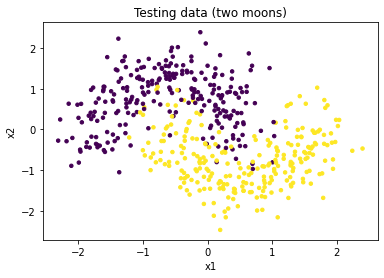

Test : (500, 2) (500,)


In [6]:
plt.figure()
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=12)
plt.title("Testing data (two moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

print("Test :", X_test.shape, y_test.shape)

## 2. Model
A 2-layer neural network:
- Hidden layer: sigmoid
- Output layer: sigmoid
- Loss: Binary Cross Entropy (BCE)


In [5]:
def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)

model = TwoLayerNN(in_dim=2, hidden_dim=16, seed=42)

lr = 0.2 #learning rate
epochs = 2000

losses = []
train_accs = []
test_accs = []

for epoch in range(1, epochs + 1):
    y_hat, cache = model.forward(X_train)
    loss = model.bce_loss(y_hat, y_train)
    grads = model.backward(cache, y_train)
    model.step(grads, lr=lr)

    if epoch % 50 == 0:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        acc_tr = accuracy(y_pred_train, y_train)
        acc_te = accuracy(y_pred_test, y_test)

        print(f"epoch={epoch:4d} loss={loss:.4f} train_acc={acc_tr:.3f} test_acc={acc_te:.3f}")

        train_accs.append(acc_tr)
        test_accs.append(acc_te)

    losses.append(loss)

print("Final test acc:", accuracy(model.predict(X_test), y_test))


epoch=  50 loss=0.4726 train_acc=0.835 test_acc=0.858
epoch= 100 loss=0.3708 train_acc=0.851 test_acc=0.878
epoch= 150 loss=0.3368 train_acc=0.855 test_acc=0.886
epoch= 200 loss=0.3245 train_acc=0.857 test_acc=0.882
epoch= 250 loss=0.3195 train_acc=0.859 test_acc=0.882
epoch= 300 loss=0.3172 train_acc=0.859 test_acc=0.884
epoch= 350 loss=0.3161 train_acc=0.859 test_acc=0.880
epoch= 400 loss=0.3156 train_acc=0.860 test_acc=0.880
epoch= 450 loss=0.3152 train_acc=0.860 test_acc=0.880
epoch= 500 loss=0.3149 train_acc=0.861 test_acc=0.880
epoch= 550 loss=0.3147 train_acc=0.861 test_acc=0.880
epoch= 600 loss=0.3146 train_acc=0.861 test_acc=0.880
epoch= 650 loss=0.3144 train_acc=0.861 test_acc=0.880
epoch= 700 loss=0.3143 train_acc=0.862 test_acc=0.880
epoch= 750 loss=0.3142 train_acc=0.862 test_acc=0.880
epoch= 800 loss=0.3141 train_acc=0.862 test_acc=0.880
epoch= 850 loss=0.3139 train_acc=0.862 test_acc=0.880
epoch= 900 loss=0.3138 train_acc=0.862 test_acc=0.880
epoch= 950 loss=0.3137 train

## 3. Training curve
We track loss across epochs to see if optimization is stable.


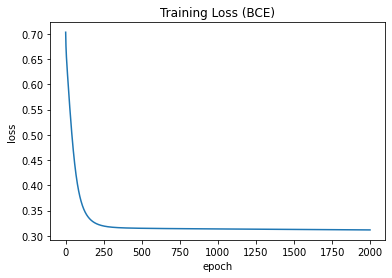

In [6]:
plt.figure()
plt.plot(losses)
plt.title("Training Loss (BCE)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


## 4. Decision boundary
We visualize the learned classification boundary in 2D space.


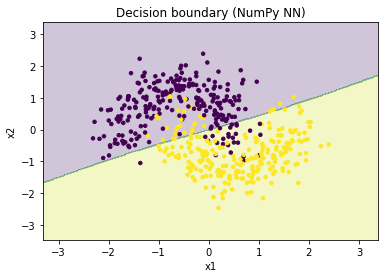

In [7]:
def plot_decision_boundary(model, X, y, grid_step=0.03):
    x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
    y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step),
        np.arange(y_min, y_max, grid_step)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, zz, alpha=0.25)
    plt.scatter(X[:,0], X[:,1], c=y, s=12)
    plt.title("Decision boundary (NumPy NN)")
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

plot_decision_boundary(model, X_test, y_test)


In [8]:
import os
os.makedirs("results", exist_ok=True)

# save loss
plt.figure()
plt.plot(losses)
plt.title("Training Loss (BCE)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.savefig("results/loss_numpy.png", dpi=200)
plt.close()

# save boundary
def save_boundary(model, X, y, path="results/boundary_numpy.png", grid_step=0.03):
    x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
    y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step),
        np.arange(y_min, y_max, grid_step)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, zz, alpha=0.25)
    plt.scatter(X[:,0], X[:,1], c=y, s=12)
    plt.title("Decision boundary (NumPy NN)")
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout()
    plt.savefig(path, dpi=200)
    plt.close()

save_boundary(model, X_test, y_test)
print("Saved to results/: loss_numpy.png, boundary_numpy.png")


Saved to results/: loss_numpy.png, boundary_numpy.png
